## Задание № 3

### Урок 3. Логистическая регрессия. Log Loss

#### Задание

1. (*) Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
[решение](#Задание-1)
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7. (*) Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# модель выбора репетитора
# ones, стаж, Стоимость услуг, рейтинг на платформе обучения
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype=np.float64)

# таргет - поступил/ не поступил
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [41]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err


> Функция LogLoss с регуляризацией

In [42]:
def calc_logloss_clip(y, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [43]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [44]:
def eval_model(X, y, iterations, alpha=1e-4, is_reg=False, eps=1e-15, verbose=True):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        if is_reg:
            err = calc_logloss_clip(y, y_pred, eps=eps)
        else:
            err = calc_logloss(y, y_pred)
        W -= alpha * (1 / n * np.dot((y_pred - y), X.T))
        if verbose and (i % (iterations / 10) == 0):
            print(i, W, err)
    return W, err


def eval_model_l2(X, y, iterations, alpha=1e-4, is_reg=False, eps=1e-15, verbose=True, tetta=0):
    def reg_l1(w):
        norm = 0
        for w_i in w:
            norm += abs(w_i)
        return norm
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        if is_reg:
            err = calc_logloss_clip(y, y_pred, eps=eps)
        else:
            err = calc_logloss(y, y_pred)
        err += tetta * reg_l1(W)
        W -= alpha * (1 / n * np.dot((y_pred - y), X.T)) + 2 * tetta * W
        if verbose and (i % (iterations / 10) == 0):
            print(i, W, err)
    return W, err


def eval_model_l1(X, y, iterations, alpha=1e-4, is_reg=False, eps=1e-15, verbose=True, tetta=0):
    def reg_l1(w):
        norm = 0
        for w_i in w:
            norm += abs(w_i)
        return norm
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        if is_reg:
            err = calc_logloss_clip(y, y_pred, eps=eps)
        else:
            err = calc_logloss(y, y_pred)
        err += tetta * reg_l1(W)
        W -= alpha * (1 / n * np.dot((y_pred - y), X.T)) + tetta * np.sign(W)
        if verbose and (i % (iterations / 10) == 0):
            print(i, W, err)
    return W, err

#### Задание 1
Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [38]:
W, err = eval_model(X, y, iterations=50, alpha=1e-4)
W, err

5 [ 0.49646415 -0.1389143   0.41768854  1.52267986] nan
10 [ 0.49621415 -0.1395643   0.18768854  1.52232986] nan
15 [ 0.49596506 -0.14021343 -0.04180058  1.5219808 ] 2.8371806221385123
20 [ 0.4960151  -0.14008339  0.02071994  1.52214084] 14.263967623246362
25 [ 0.49596508 -0.1402134  -0.01428648  1.52213082] nan
30 [ 0.49599183 -0.1401142   0.03298129  1.52226004] 1.1442812086978962
35 [ 0.49593661 -0.14025019 -0.00496832  1.52224391] nan
40 [ 0.4959596  -0.14015502  0.04025133  1.52236877] 2.028321956543663
45 [ 0.49589322 -0.14030519 -0.00477828  1.52233817] nan
50 [ 0.49591785 -0.14020871  0.04115407  1.52246467] 2.5650205479860313


C:\Users\8523~1\AppData\Local\Temp/ipykernel_29160/2865143382.py:2: RuntimeWarning: divide by zero encountered in log
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
C:\Users\8523~1\AppData\Local\Temp/ipykernel_29160/2865143382.py:2: RuntimeWarning: invalid value encountered in multiply
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


(array([ 0.49591785, -0.14020871,  0.04115407,  1.52246467]),
 2.5650205479860313)

> На начальных этапах алгоритма видим часто что функция logloss не определена. Также видны ошибки.
>

In [9]:
W, _ = eval_model(X, y, iterations=50, alpha=1e-4, is_reg=True)
W

5 [ 0.49646415 -0.1389143   0.41768854  1.52267986] 17.269787996170443
10 [ 0.49621415 -0.1395643   0.18768854  1.52232986] 17.269787996170443
15 [ 0.49596506 -0.14021343 -0.04180058  1.5219808 ] 2.8371806221385123
20 [ 0.4960151  -0.14008339  0.02071994  1.52214084] 12.839658280017645
25 [ 0.49596508 -0.1402134  -0.01428648  1.52213082] 12.464727256354816
30 [ 0.49599183 -0.1401142   0.03298129  1.52226004] 1.1442812086978962
35 [ 0.49593661 -0.14025019 -0.00496832  1.52224391] 14.857160480701134
40 [ 0.4959596  -0.14015502  0.04025133  1.52236877] 2.028321956543663
45 [ 0.49589322 -0.14030519 -0.00477828  1.52233817] 14.891478526063684
50 [ 0.49591785 -0.14020871  0.04115407  1.52246467] 2.5650205479860313


array([ 0.49591785, -0.14020871,  0.04115407,  1.52246467])

> При включении регуляризации (замена крайних значений) сбои пропадают.

In [10]:
import sklearn.metrics

# help(sklearn.metrics.log_loss)

    eps : float, default=1e-15
        Log loss is undefined for p=0 or p=1, so probabilities are
        clipped to max(eps, min(1 - eps, p)).

#### Задание 2.
Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [11]:
W, _ = eval_model(X, y, iterations=5000, alpha=1e-6, is_reg=True, eps=1e-15)
W

500 [ 0.49646415 -0.1389143   0.41768854  1.52267986] 17.269787996170443
1000 [ 0.49621415 -0.1395643   0.18768854  1.52232986] 17.269787996170443
1500 [ 0.49600071 -0.14009687 -0.00243035  1.52204463] 0.6047454624418128
2000 [ 0.4959597  -0.14006576 -0.00243045  1.52206805] 0.604739065410919
2500 [ 0.49591869 -0.14003466 -0.00243055  1.52209148] 0.6047326701168281
3000 [ 0.49587768 -0.14000358 -0.00243065  1.52211491] 0.6047262765586355
3500 [ 0.49583668 -0.1399725  -0.00243074  1.52213833] 0.6047198847354356
4000 [ 0.49579567 -0.13994144 -0.00243084  1.52216176] 0.6047134946463244
4500 [ 0.49575467 -0.13991038 -0.00243094  1.52218518] 0.6047071062903984
5000 [ 0.49571367 -0.13987934 -0.00243104  1.52220861] 0.6047007196667514


array([ 0.49571367, -0.13987934, -0.00243104,  1.52220861])

In [12]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [13]:
z = np.dot(W, X)
y_pred = sigmoid(z)
y_pred

array([0.65982733, 0.54396557, 0.80800441, 0.60334475, 0.40022935,
       0.51826521, 0.67181125, 0.23173749, 0.68655806, 0.69621452])

In [14]:
W

array([ 0.49571367, -0.13987934, -0.00243104,  1.52220861])

In [15]:
np.linspace(1e-4, 1e-6, 10)

array([1.0e-04, 8.9e-05, 7.8e-05, 6.7e-05, 5.6e-05, 4.5e-05, 3.4e-05,
       2.3e-05, 1.2e-05, 1.0e-06])

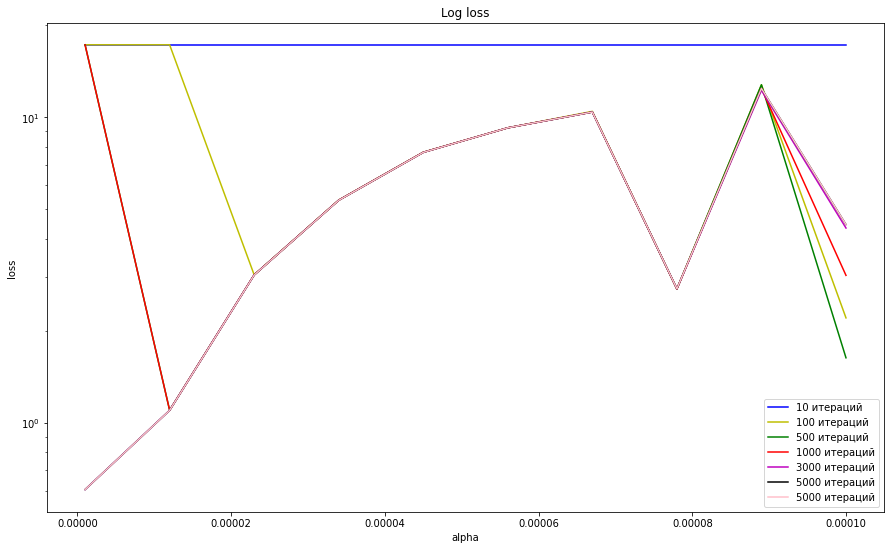

In [16]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams["figure.figsize"] = 15, 9

alphas = np.linspace(1e-4, 1e-6, 10)

iteracts = [(10, "b"), (100, "y"), (500, "g"), (1000, "r"), (3000, "m"), (5000, "k"), (5000, "pink")]
for it in iteracts:
    errs = []
    for a in alphas:
        W, err = eval_model(X, y, iterations=it[0], is_reg=True, alpha=a, eps=1e-15, verbose=False)
        errs.append(err)
    plt.plot(alphas, errs, color=it[1], label=f'{it[0]} итераций')

plt.yscale('log')
plt.title('Log loss')
plt.xlabel('alpha')
plt.ylabel('loss')
plt.legend()

plt.show()

> наиболее быстрое схождение получается при alpha = 1e-4 b количества итераций 5000

#### Задание 3.

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [18]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    return sigmoid(z)

In [19]:
y_pred_proba = calc_pred_proba(W, X)
y_pred_proba

array([0.65982733, 0.54396557, 0.80800441, 0.60334475, 0.40022935,
       0.51826521, 0.67181125, 0.23173749, 0.68655806, 0.69621452])

In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true=y, y_score=y_pred_proba)

0.8400000000000001

#### Задание 3.

Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [21]:
from sklearn.linear_model import LogisticRegression
# help(LogisticRegression)

In [22]:
def calc_pred(W, X):
    y_pp = calc_pred_proba(W, X)
    y_pp[y_pp > 0.5] = 1
    y_pp[y_pp <= 0.5] = 0
    return y_pp

In [23]:
y, calc_pred(W, X)


(array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1.]))

#### Задание 5.
Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [24]:
def err_matrix(y, y_p):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(y)):
        if y[i] == 1 and y_p[i] == 1:
            TP += 1
        elif y[i] == 1 and y_p[i] == 0:
            FP += 1
        elif y[i] == 0 and y_p[i] == 0:
            TN += 1
        elif y[i] == 0 and y_p[i] == 1:
            FN += 1
    return TP, TN, FP, FN

In [25]:
TP, TN, FP, FN = err_matrix(y, calc_pred(W, X))
print(f' TP:{TP} FP:{FP}')
print(f' FN:{FN} TN:{TN}')

 TP:4 FP:1
 FN:4 TN:1


|<empty>| y = +1 | y = -1 |
--- | --- | ---
| a(x) = +1| 4 | 1
| a(x) = -1| 4 | 1

In [26]:
print(f' Accuracy= {(TP + TN) / len(y)}')
Precision = TP / (TP + FP)
print(f' Precision = {Precision}')
Recall = TP / (TP + FN)
print(f' Recall = {Recall}')
print(f' F1 = {2 * Precision * Recall / (Precision + Recall)}')

 Accuracy= 0.5
 Precision = 0.8
 Recall = 0.5
 F1 = 0.6153846153846154


#### Задание 6.
Могла ли модель переобучиться? Почему?
> Сначала второстепенные, но важные моменты.
1. Размерность признаков на обучающей выборке. Влияние большых чисел на модель есть, и это влияние будет распространяться и на тестовую выборку. **Решение:** нормализация и стандартизация.
2. Дисбаланс классов. Априори модель будет настроена по большему классу. **Решение:** устранение дисбаланса: генерация доп объектов, удаление лишних и тд.
>
> Непосредственно, при прочих равных, переобучение может проявляться:
3. Проклятие размерности. Чем выше размерность, тем выше вероятность того, что можно идеально разделить два набора значений.
**Решение:** снижение размерности.
4. На различных данных не может быть явного определения переобучения. Об этом свидетельствует ROC: вероятность того что положительный результат будет иметь более высокую вероятность, чем положительный.
При этом предсказание многомерной модели логистического риска, например для *корреляции событий безопасности и выявления аномалий* может вполне находиться на уровне 60-70% и это нормально.
С другой стороны для систем управления с высокой степенью определенностью и невысокими размерностями,
например, для *систем управления двигателями квадрокоптера* значения ниже чем 95% могут быть не приемлемыми.
**Решение:** Системный разведочный анализ данных и предметной области.

#### Задание 7. (*)
Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.


In [56]:
W = eval_model_l2(X, y, iterations=5000, alpha=1e-6, is_reg=True, tetta=0.6)
W

500 [-3.73271479e-09 -1.43943912e-08  1.83771884e-05  1.17362394e-07] 0.6927029536405666
1000 [-3.73271479e-09 -1.43943912e-08  1.83771884e-05  1.17362394e-07] 0.6927029536405666
1500 [-3.73271479e-09 -1.43943912e-08  1.83771884e-05  1.17362394e-07] 0.6927029536405666
2000 [-3.73271479e-09 -1.43943912e-08  1.83771884e-05  1.17362394e-07] 0.6927029536405666
2500 [-3.73271479e-09 -1.43943912e-08  1.83771884e-05  1.17362394e-07] 0.6927029536405666
3000 [-3.73271479e-09 -1.43943912e-08  1.83771884e-05  1.17362394e-07] 0.6927029536405666
3500 [-3.73271479e-09 -1.43943912e-08  1.83771884e-05  1.17362394e-07] 0.6927029536405666
4000 [-3.73271479e-09 -1.43943912e-08  1.83771884e-05  1.17362394e-07] 0.6927029536405666
4500 [-3.73271479e-09 -1.43943912e-08  1.83771884e-05  1.17362394e-07] 0.6927029536405666
5000 [-3.73271479e-09 -1.43943912e-08  1.83771884e-05  1.17362394e-07] 0.6927029536405666


(array([-3.73271479e-09, -1.43943912e-08,  1.83771884e-05,  1.17362394e-07]),
 0.6927029536405666)

In [57]:
W = eval_model_l1(X, y, iterations=5000, alpha=1e-6, is_reg=True, tetta=0.1)
W

500 [ 0.09671115  0.0617279   0.05851354 -0.07690024] 15.417684907662315
1000 [ 0.09671115  0.0617279   0.07226353 -0.07682524] 13.140914162286037
1500 [ 0.09671114  0.06172789  0.08600919 -0.07675025] 7.506754058269298
2000 [ 0.09670659  0.06172301  0.09708199 -0.07668038] 1.8555859383288977
2500 [ 0.09668548  0.06169884  0.09743546 -0.07663058] 1.685660749395333
3000 [ 0.09666387  0.06167402  0.09743551 -0.07658142] 1.6856441308347523
3500 [ 0.09664226  0.0616492   0.09743549 -0.07653227] 1.685654873238328
4000 [ 0.09662066  0.06162438  0.09743548 -0.07648311] 1.685665619692253
4500 [ 0.09659905  0.06159956  0.09743546 -0.07643396] 1.6856763662936116
5000 [ 0.09657744  0.06157474  0.09743545 -0.0763848 ] 1.6856871130418551


(array([ 0.09657744,  0.06157474,  0.09743545, -0.0763848 ]),
 1.6856871130418551)